In [1]:
# In this code example, we'll use different progress curves to re-time
# (or in other words, re-parameterize) the spline we computed in the
# previous example.

%pylab inline
from pylab import *

import mpl_toolkits.mplot3d

import path_utils
path_utils.add_relative_to_current_source_file_path_to_sys_path("../../lib")

import flashlight.curve_utils  as curve_utils
import flashlight.spline_utils as spline_utils

Populating the interactive namespace from numpy and matplotlib
Initializing flashlight v0.0.1


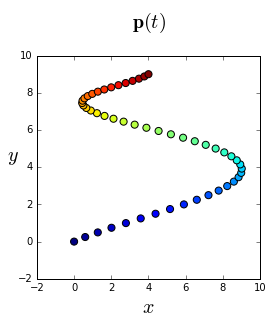

In [2]:
# We compute a spline curve exactly as in the previous example. Notice that the
# native parameterization of this spline curve does not distribute samples evenly
# along the curve. The samples are bunched together at the kinks. In this code
# example, we will re-parameterize the curve according to a progress curve that
# we define ourselves.

T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_y, T_x]
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_y, P_x]

num_samples = 50

C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd, num_samples=num_samples)

t = T_eval[:,0]

figsize(4,4);
scatter(P_eval[:,1], P_eval[:,0], c=T_eval[:,0], s=50);
title("$\mathbf{p}(t)$\n", fontsize=20); ylabel("$y$", rotation="horizontal", fontsize=20); xlabel("$x$", fontsize=20);

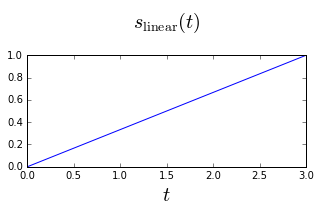

In [3]:
# In the simplest case, we re-parameterize our spline to make uniform
# progress as we sweep through parameter space. In other words, we can
# compute an arc-length re-parameterization of our spline, where the
# re-parameterized spline traverses a fixed amount of arc length, for
# a fixed change in its parameter value. To compute such a
# re-parameterization, our first step is to define a linear progress
# curve.

s_linear = linspace(0.0, 1.0, num_samples)

figsize(5,2);
plot(t, s_linear);
title("$s_{\mathrm{linear}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

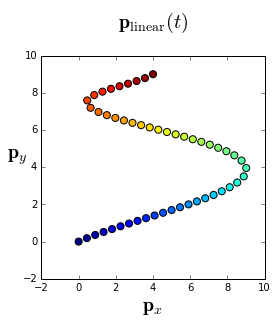

In [4]:
# We compute our re-parameterization by calling curve.reparameterize_curve.
# We pass in the original spline samples, as well as the progress curve we
# want the re-parameterized spline to have.
#
# This function returns several values, but the most important value being
# returned P_eval_new. This array contains samples for the re-parameterized
# spline. Note that when we plot these samples, they are spaced evenly along
# the curve, because this is the behavior we defined in our progress curve.

P_eval_linear, t_linear, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_linear)

figsize(4,4);
scatter(P_eval_linear[:,1], P_eval_linear[:,0], c=t, s=50);
title("$\mathbf{p}_{\mathrm{linear}}(t)$\n", fontsize=20); ylabel("$\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\mathbf{p}_x$", fontsize=20);

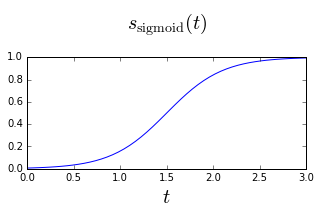

In [5]:
# We can use any method we want to compute our preferred progress curve.
# In this case, we define a sigmoid function to give us a slow-fast-slow
# progress curve.

t_sigmoid_min = -5
t_sigmoid_max = 5
t_sigmoid     = linspace(t_sigmoid_min, t_sigmoid_max, num_samples)
s_sigmoid     = 1 / (1 + np.power(e, -t_sigmoid))

figsize(5,2);
plot(t, s_sigmoid);
title("$s_{\mathrm{sigmoid}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

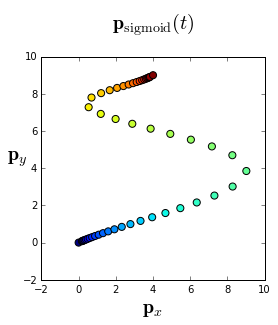

In [6]:
# We see this slow-fast-slow behavior when we plot our re-parameterized spline.

P_eval_sigmoid, t_sigmoid, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_sigmoid)

figsize(4,4);
scatter(P_eval_sigmoid[:,1], P_eval_sigmoid[:,0], c=t, s=50);
title("$\mathbf{p}_{\mathrm{sigmoid}}(t)$\n", fontsize=20);
ylabel("$\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\mathbf{p}_x$", fontsize=20);

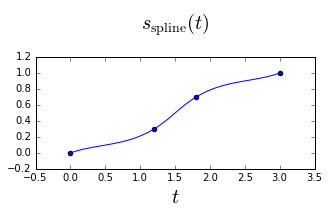

In [7]:
# We can also define a slow-fast-slow progress curve with spline keyframes

T_s = matrix([0.0,1.2,1.8,3.0]).T.A
P_s = matrix([0.0,0.3,0.7,1.0]).T.A

C_s, T_s, sd_s = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P_s, T_s, degree=7, lamb=[0,0,0,1,0])
    
P_s_eval, T_s_eval, dT_s = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C_s, T_s, sd_s, num_samples=num_samples)

s_spline = P_s_eval

figsize(5,2);
plot(t, s_spline); scatter(T_s[:,0], P_s[:,0]);
title("$s_{\mathrm{spline}}(t)$\n", fontsize=20); xlabel("$t$", fontsize=20);

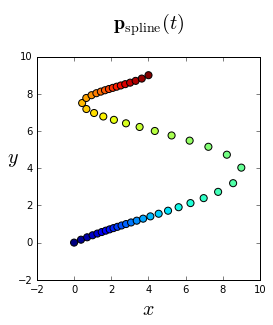

In [8]:
# Again, we see this slow-fast-slow behavior when we plot our re-parameterized spline.

P_eval_spline, t_spline, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_spline)

figsize(4,4);
scatter(P_eval_spline[:,1], P_eval_spline[:,0], c=t, s=50);
title("$\mathbf{p}_{\mathrm{spline}}(t)$\n", fontsize=20);
ylabel("$\mathbf{p}_y$", rotation="horizontal", fontsize=20); xlabel("$\mathbf{p}_x$", fontsize=20);

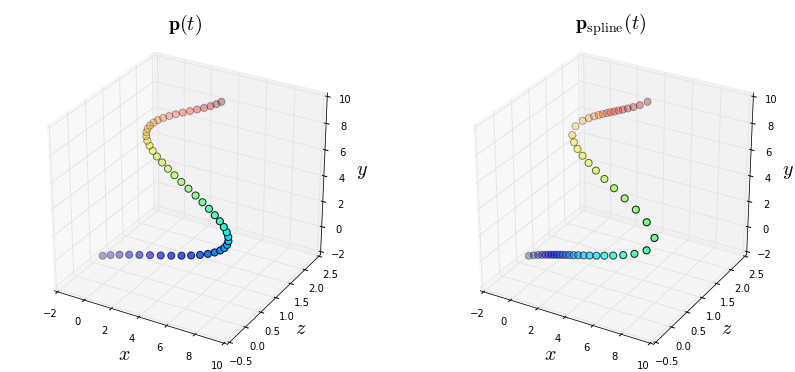

In [9]:
# We call curve.reparameterize_curve in exactly the same way to re-parameterize
# a 3D curve.

T_z = matrix([0,1,2,3]).T.A
T_y = matrix([0,1,2,3]).T.A
T_x = matrix([0,1,2,3]).T.A
T   = c_[T_z, T_y, T_x] 
P_z = matrix([0,0,1,2]).T.A
P_y = matrix([0,4,7,9]).T.A
P_x = matrix([0,9,1,4]).T.A
P   = c_[P_z, P_y, P_x]

C, T, sd = \
    spline_utils.compute_minimum_variation_nonlocal_interpolating_b_spline_coefficients(
        P, T, degree=7, lamb=[0,0,0,1,0])
    
P_eval, T_eval, dT = \
    spline_utils.evaluate_minimum_variation_nonlocal_interpolating_b_spline(
        C, T, sd,num_samples=num_samples)

P_eval_linear, t_linear, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_linear)
P_eval_spline, t_spline, P_eval_cum_length, t_norm = curve_utils.reparameterize_curve(P_eval, s_spline)

figsize(14,6);
fig = plt.figure();

ax = fig.add_subplot(121, projection="3d");
ax.scatter(P_eval[:,2], P_eval[:,0], P_eval[:,1], c=t, s=50);
title("$\mathbf{p}(t)$\n", fontsize=20);
ax.set_zlabel("$\mathbf{p}_y$", fontsize=20);
xlabel("$\mathbf{p}_x$", fontsize=20); ylabel("$\mathbf{p}_z$", fontsize=20);

ax = fig.add_subplot(122, projection="3d");
ax.scatter(P_eval_spline[:,2], P_eval_spline[:,0], P_eval_spline[:,1], c=t, s=50);
title("$\mathbf{p}_{\mathrm{spline}}(t)$\n", fontsize=20);
ax.set_zlabel("$y$", fontsize=20); xlabel("$x$", fontsize=20); ylabel("$z$", fontsize=20);